In [37]:
import pandas as pd
import numpy as np
import os
import rebound
import matplotlib 
%matplotlib inline
from matplotlib import pyplot as plt

from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.stats.mstats import normaltest

DO NOT RUN THE NEXT THRE CELLS AS THEY ARE ONLY USED TO GENERATE THE CSV FILES FOR LATER USE

In [38]:
file_path = "../data/distributions/"
files = os.listdir(file_path)
long_int= [x for x in files if x[-3:]=="1e8"]
print long_int
pd_array = []
pd_name = []

['Sys_1174_1e8', 'Sys_42_1e8', 'Sys_13362_1e8', 'Sys_24763_1e8', 'Sys_4641_1e8', 'Sys_19591_1e8', 'Sys_5958_1e8', 'Sys_3898_1e8', 'Sys_17641_1e8', 'Sys_12073_1e8', 'Sys_22_1e8', 'Sys_15220_1e8', 'Sys_24576_1e8', 'Sys_5505_1e8', 'Sys_24248_1e8', 'Sys_20041_1e8', 'Sys_10518_1e8', 'Sys_24017_1e8', 'Sys_18651_1e8', 'Sys_2128_1e8', 'Sys_24453_1e8', 'Sys_7431_1e8', 'Sys_4753_1e8', 'Sys_20620_1e8', 'Sys_24631_1e8', 'Sys_24346_1e8', 'Sys_21872_1e8', 'Sys_2105_1e8', 'Sys_19197_1e8', 'Sys_8462_1e8', 'Sys_15003_1e8', 'Sys_23005_1e8', 'Sys_22998_1e8', 'Sys_22032_1e8', 'Sys_24930_1e8', 'Sys_67_1e8', 'Sys_24824_1e8', 'Sys_24008_1e8', 'Sys_8744_1e8', 'Sys_20972_1e8', 'Sys_23975_1e8', 'Sys_3000_1e8', 'Sys_7341_1e8', 'Sys_2008_1e8', 'Sys_24705_1e8', 'Sys_8582_1e8', 'Sys_16588_1e8', 'Sys_18539_1e8', 'Sys_2010_1e8', 'Sys_12840_1e8', 'Sys_24013_1e8', 'Sys_19898_1e8', 'Sys_2612_1e8']


In [39]:
def get_times(row):   
    #print fcpath+row["runstring"]
    sim = rebound.Simulation.from_file(fcpath+row["runstring"])
    #shadow = rebound.Simulation.from_file(shadowfcpath+row["runstring"])
    columns = ['t']
    features = [ sim.t ]
    #print '{0:.16f}'.format(sim.t)
    return pd.Series(features, index=columns)

In [40]:
#generate the csv from the indivual files from the rebound output

import time
start = time.time()
for i, files in enumerate(long_int[:]):
    
    new_path = file_path+"/"+files
    #df = pd.read_csv(new_path)
    #%%time
    fcpath = new_path+'/final_conditions/fc'
    read_path = new_path+"/"+files[4:-4]+".csv"
    df=pd.read_csv(read_path)
    
    #%%time
    try:
        df = pd.concat([df, df.apply(get_times, axis=1)], axis=1)
        pd_array.append(df)
        pd_name.append(files)
        df.to_csv("../data/LongTimeScale/" + pd_name[i]+".csv")

    except Exception as e:
        print e
    #print read_path
    print i
end = time.time()
print (end - start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
472.667871952


In [36]:
file_path = "../../../stability_stuff/stabilitydataset/data/LongTimeScale/"
files = os.listdir(file_path)
print files

['Sys_5505_1e8.csv', 'Sys_16588_1e8.csv', 'Sys_24930_1e8.csv', 'Sys_23005_1e8.csv', 'Sys_13362_1e8.csv', 'Sys_24013_1e8.csv', 'Sys_19591_1e8.csv', 'Sys_12840_1e8.csv', 'Sys_24346_1e8.csv', 'Sys_19898_1e8.csv', 'Sys_42_1e8.csv', 'Sys_23975_1e8.csv', 'Sys_24705_1e8.csv', 'Sys_22998_1e8.csv', 'Sys_20620_1e8.csv', 'Sys_17641_1e8.csv', 'Sys_21872_1e8.csv', 'Sys_18651_1e8.csv', 'Sys_3000_1e8.csv', 'Sys_24631_1e8.csv', 'Sys_8462_1e8.csv', 'Sys_1174_1e8.csv', 'Sys_24017_1e8.csv', 'Sys_24248_1e8.csv', 'Sys_2128_1e8.csv', 'Sys_20041_1e8.csv', 'Sys_19197_1e8.csv', 'Sys_8744_1e8.csv', 'Sys_12073_1e8.csv', 'Sys_24576_1e8.csv', 'Sys_15003_1e8.csv', 'Sys_18539_1e8.csv', 'Sys_7431_1e8.csv', 'Sys_24453_1e8.csv', 'Sys_5958_1e8.csv', 'Sys_24763_1e8.csv', 'Sys_3898_1e8.csv', 'Sys_4753_1e8.csv', 'Sys_67_1e8.csv', 'Sys_2010_1e8.csv', 'Sys_15220_1e8.csv', 'Sys_24824_1e8.csv', 'Sys_2008_1e8.csv', 'Sys_20972_1e8.csv', 'Sys_22_1e8.csv', 'Sys_24008_1e8.csv', 'Sys_7341_1e8.csv', 'Sys_10518_1e8.csv']


Sys_5505_1e8.csv 4.61439401305 0.315693064323
Sys_16588_1e8.csv 6.62868040348 0.461928651882
Sys_24930_1e8.csv 5.18212255808 0.473441709848
Sys_23005_1e8.csv 6.76384330619 0.457545508171
Sys_19591_1e8.csv 6.18262130787 0.466648537725
Sys_12840_1e8.csv 4.70674825403 0.614338388127
Sys_24346_1e8.csv 6.64300256059 0.347742992626
Sys_19898_1e8.csv 4.87363205722 0.390358676558
Sys_42_1e8.csv 4.07101066054 0.458957441336
Sys_23975_1e8.csv 5.74634631972 0.357914717034
Sys_24705_1e8.csv 5.27330548612 0.399256418664
Sys_22998_1e8.csv 6.16872344277 0.398742380684
Sys_20620_1e8.csv 5.4214350169 0.574658387471
Sys_17641_1e8.csv 5.45021689843 0.387622185949
Sys_21872_1e8.csv 5.1954103698 0.383354916906
Sys_18651_1e8.csv 6.64037665472 0.507533022619
Sys_3000_1e8.csv 6.09023776416 0.521330170556
Sys_24631_1e8.csv 5.11616230377 0.340650289766
Sys_8462_1e8.csv 5.52203547723 0.530931106236
Sys_1174_1e8.csv 5.25905822642 0.238773389841
Sys_24017_1e8.csv 5.28566920275 0.636529168305
Sys_24248_1e8.csv 5.52

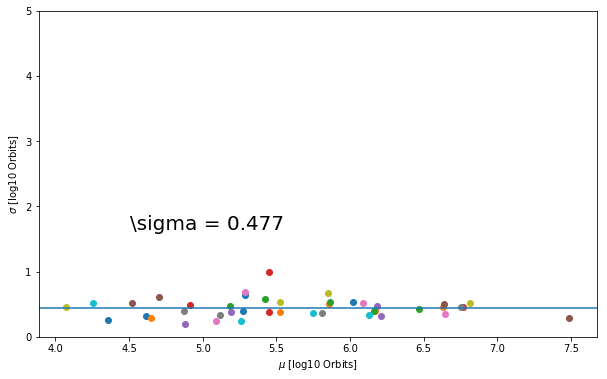

Sample average 0.446099


In [31]:
#draw a scatter plot of each of the sigmas for each system:
plt.figure(figsize=(10,6))
sample_avg = 0
count = 0
for i , name in enumerate(files):
    pdframe = pd.read_csv(file_path + name, index_col = 0)
    #print pdframe.head()
    #break
    pdframe = pdframe[ (pdframe["t"]<1e8) ]

    times = np.log10(pdframe["t"].as_matrix())
    #x = np.linspace(times.min(), times.max(), 200)
    mu1, std1 = norm.fit(times)
    if mu1 > 3:
        plt.scatter(mu1, std1)
        sample_avg+= std1
        count +=1
        print name, mu1, std1
    if std1> 0.3 and std1 < 0.5:
        #print name, mu1
        continue
    #pdframe.to_csv("../data/LongTimeScale/" + pd_name[i]+".csv")
    #pd.
    #break
    
plt.axhline(y=0.447)
plt.annotate(r"\sigma = 0.477",
             xycoords='figure pixels', xy=(130, 150), fontsize = 20)
plt.xlabel("$\mu$ [log10 Orbits]")
plt.ylabel("$\sigma$ [log10 Orbits]")
plt.ylim([0,5])
plt.show()
print("Sample average %f" % (sample_avg/float(count)))

4.05994587797 7.82613623636


(array([  58.,  189.,  253.,  190.,  156.,   85.,   43.,   16.,    5.,    4.]),
 array([ 4.05994588,  4.43656491,  4.81318395,  5.18980299,  5.56642202,
         5.94304106,  6.31966009,  6.69627913,  7.07289816,  7.4495172 ,
         7.82613624]),
 <a list of 10 Patch objects>)

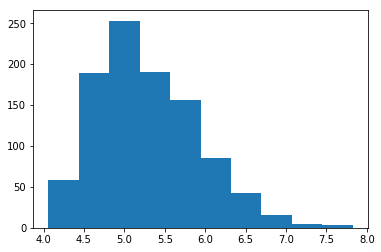

In [35]:
#Run MCMC to get posterior distribution 
#try for one
#Sample a Gaussian
data = pd.read_csv("../data/LongTimeScale/Sys_24017_1e8.csv")
data["t"]=np.log10(data["t"])
print data["t"].min(), data["t"].max()
plt.hist(data["t"])